<a href="https://www.kaggle.com/code/debbiechu/covid-articles-nlp?scriptVersionId=174770206" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Purpose

Apply NLP techniques on Covid articles/ abstract to answer key **scientific topic** questions. I will utilize various language models and NLP techniques to classify Covid abstracts, and to extract and summarize important info related to the topic.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

For text mining, I will analyze the ones with more studies:

**Seasonality of transmission** (100 studies): Knowing the seasonality of transmission will help healthcare systems prepare for outbreaks, allocate resources and form strategies.

## Datasets required

## What is the **Seasonality of Transmission** of Covid-19?

In [5]:
sot = dfs['scientific_questions/Seasonality of transmission']
sot.head()

,Unnamed: 0,Date,Study,Study Link,Journal,Study Type,Factors,Influential,Excerpt,Measure of Evidence,Added on
0,0,2020-05-26,Containing the Spread of Coronavirus Disease 2...,https://doi.org/10.1101/2020.05.23.20111468,medrxiv,Ecological Regression,Temperature,Y,We found that high temperature mitigates the t...,countries: 70,05/31/2020
1,1,2020-05-26,Containing the Spread of Coronavirus Disease 2...,https://doi.org/10.1101/2020.05.23.20111468,medrxiv,Ecological Regression,Relative Humidity,Y,High relative humidity promotes COVID-19 trans...,countries: 70,05/31/2020
2,2,2020-05-25,COVID-19: Effects of weather conditions on the...,https://doi.org/10.1101/2020.05.24.20111963,medrxiv,Simulation,Temperature,Y,Our results suggest that high temperature and ...,-,05/31/2020
3,3,2020-05-25,COVID-19: Effects of weather conditions on the...,https://doi.org/10.1101/2020.05.24.20111963,medrxiv,Simulation,Humidity,Y,Our results suggest that high temperature and ...,-,05/31/2020
4,4,2020-05-25,COVID-19: Effects of weather conditions on the...,https://doi.org/10.1101/2020.05.24.20111963,medrxiv,Simulation,Wind Velocity,Y,"Therefore, the droplet spreading distance has ...",-,05/31/2020


In [6]:
meta = dfs['metadata']
meta.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


Both the **Excerpt from sot** and **abstract from meta** could provide useful information.

In [7]:
sot[['Study','Study Link']].iloc[0]

Study         Containing the Spread of Coronavirus Disease 2...
Study Link          https://doi.org/10.1101/2020.05.23.20111468
Name: 0, dtype: object

In [8]:
meta[meta['title']=='Containing the Spread of Coronavirus Disease 2019 (COVID-19): Meteorological Factors and Control Strategies'][['title','doi']]

,title,doi
876623,Containing the Spread of Coronavirus Disease 2...,10.1101/2020.05.23.20111468


the meta data and sot contains the same articles, so we can utilize both texts for analysis

In [9]:
merged_df = meta.merge(sot, left_on='title', right_on='Study', how='inner')[['title','abstract','Excerpt']]
print(merged_df.shape)
merged_df.head()

(123, 3)


,title,abstract,Excerpt
0,"Temperature, humidity, and wind speed are asso...","In absence of empirical research data, there h...",Cold and dry environments are more favourable ...
1,"Temperature, humidity, and wind speed are asso...","In absence of empirical research data, there h...",Cold and dry environments are more favourable ...
2,"Temperature, humidity, and wind speed are asso...","In absence of empirical research data, there h...",-
3,Effects of temperature and humidity on the dai...,The coronavirus disease 2019 (COVID-19) pandem...,A 1% increase in relative humidity was associa...
4,Effects of temperature and humidity on the dai...,The coronavirus disease 2019 (COVID-19) pandem...,A 1 °C increase in temperature was associated ...


There appear to be many duplicates so we will drop them.

In [10]:
# drop duplications, only keep the first study
merged_df.drop_duplicates(subset='title', keep='first', inplace=True)

# reset index
merged_df.reset_index(drop=True, inplace=True)

# add label (ground truth)
merged_df['label'] = 1

print(merged_df.shape)
merged_df.head()

(36, 4)


,title,abstract,Excerpt,label
0,"Temperature, humidity, and wind speed are asso...","In absence of empirical research data, there h...",Cold and dry environments are more favourable ...,1
1,Effects of temperature and humidity on the dai...,The coronavirus disease 2019 (COVID-19) pandem...,A 1% increase in relative humidity was associa...,1
2,Effects of temperature and humidity on the spr...,BACKGROUND: Faced with the global pandemic of ...,warm and wet climates seem to reduce the sprea...,1
3,Correlation between weather and Covid-19 pande...,This study aims to analyze the correlation bet...,only temperature average (°C) was significantl...,1
4,Does weather affect the growth rate of COVID-1...,The undefendable outbreak of novel coronavirus...,Temperature is the most influential parameter ...,1


We only have 36 studies. We will analyze abstract and Exerpt separately to see which one has better information for classifying the studies as seasonality of transmission topic related.

To see how well our models/ techniques classify the studies, we will randomly add in some unrelated studies from meta data. 

In [11]:
# gather random data not associated with seasonality of transmission

import random

# Filter out rows with titles that are already in merged_df or rows with null values in title or abstract
filtered_meta = meta[~meta['title'].isin(merged_df['title'].tolist()) & ~meta['title'].isnull() & ~meta['abstract'].isnull()]

# Randomly select 500 rows from the filtered_meta
unrelated_df = filtered_meta.sample(n=5000, random_state=1)

unrelated_df = unrelated_df[['title','abstract']]
unrelated_df['label'] = 0
print(unrelated_df.shape)
print(unrelated_df.isnull().sum())
unrelated_df.head()

(5000, 3)

title       0

abstract    0

label       0

dtype: int64


,title,abstract,label
37068,Design and Simulation of Isolation Room for a ...,"Heating, ventilation and air conditioning (HVA...",0
642425,Efectividad de la telerehabilitación en terapi...,Introducción La rehabilitación y las acciones ...,0
137803,Monocyte subset distribution and surface expre...,Systemic inflammation is a major feature of th...,0
756035,Single-Cell Profiling of the Antigen-Specific ...,RNA-based vaccines against SARS-CoV-2 are crit...,0
547342,COVID-19: What can we learn from shared experi...,COVID-19 is an infectious disease that has spr...,0


In [12]:
# concat the related and unrelated portions

df = pd.concat([merged_df[['title','abstract','label']], unrelated_df])
df.reset_index(drop=True, inplace=True)
print(df.shape)
df.head()

(5036, 3)


,title,abstract,label
0,"Temperature, humidity, and wind speed are asso...","In absence of empirical research data, there h...",1
1,Effects of temperature and humidity on the dai...,The coronavirus disease 2019 (COVID-19) pandem...,1
2,Effects of temperature and humidity on the spr...,BACKGROUND: Faced with the global pandemic of ...,1
3,Correlation between weather and Covid-19 pande...,This study aims to analyze the correlation bet...,1
4,Does weather affect the growth rate of COVID-1...,The undefendable outbreak of novel coronavirus...,1


In [13]:
df.label.value_counts()

label
0    5000
1      36
Name: count, dtype: int64

Our final data contains 136 rows and is ready for text classification. Now, we have to **clean the texts and vectorize them** for classification purpose.

## Text Classification

### NLTK, TFIDF & traditional classification models

In [14]:
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.corpus import stopwords

# Remove punctuation from abstracts
abs_no_punc = [''.join(c for c in w if c not in punctuation) for w in df.abstract]

# Tokenize abstracts into words using word_tokenize
tokenized_abstracts = [word_tokenize(abstract) for abstract in abs_no_punc]

# Get English stopwords
sw = stopwords.words('english')

# Remove stopwords from each title
abs_no_sw = [
    ' '.join([w for w in abstract_tokens if w.lower() not in sw])
    for abstract_tokens in tokenized_abstracts
]

# Method 1: Stemmer (reducing words to their root form and simplifying keyword usage. more efficient.)
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
abstract_stemmed = [
    ' '.join([stemmer.stem(word) for word in abstract.split()])
    for abstract in abs_no_sw
]

# Method 2: Lemmatizer (preserves semantic meaning by converting words to their base forms)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
abstract_lemmatized = [
    ' '.join([lemmatizer.lemmatize(word) for word in abstract.split()])
    for abstract in abs_no_sw
]

# create 'clean_abstract' columns
df['clean_abstract_s'] = abstract_stemmed
df['clean_abstract_l'] = abstract_lemmatized
df.head()

,title,abstract,label,clean_abstract_s,clean_abstract_l
0,"Temperature, humidity, and wind speed are asso...","In absence of empirical research data, there h...",1,absenc empir research data consider specul hyp...,absence empirical research data considerable s...
1,Effects of temperature and humidity on the dai...,The coronavirus disease 2019 (COVID-19) pandem...,1,coronaviru diseas 2019 covid19 pandem defin gl...,coronavirus disease 2019 COVID19 pandemic defi...
2,Effects of temperature and humidity on the spr...,BACKGROUND: Faced with the global pandemic of ...,1,background face global pandem covid19 declar w...,BACKGROUND Faced global pandemic COVID19 decla...
3,Correlation between weather and Covid-19 pande...,This study aims to analyze the correlation bet...,1,studi aim analyz correl weather covid19 pandem...,study aim analyze correlation weather covid19 ...
4,Does weather affect the growth rate of COVID-1...,The undefendable outbreak of novel coronavirus...,1,undefend outbreak novel coronaviru sarscov2 le...,undefendable outbreak novel coronavirus SARSCO...


In [15]:
# vectorize clean_abstract_s
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidfvectorizer_s = vectorizer.fit_transform(df['clean_abstract_s'])
print(vectorizer.get_feature_names_out())

['00' '000' '0000' ... '随着疫情高峰及更多地区开展病原学检测' 'ﬁbrosi' 'ﬁnding']


### XGBoost

[0]	validation_0-logloss:0.44223

[1]	validation_0-logloss:0.30383

[2]	validation_0-logloss:0.21656

[3]	validation_0-logloss:0.15902

[4]	validation_0-logloss:0.11820

[5]	validation_0-logloss:0.08978

[6]	validation_0-logloss:0.06961

[7]	validation_0-logloss:0.05585

[8]	validation_0-logloss:0.04616

[9]	validation_0-logloss:0.03951

[10]	validation_0-logloss:0.03430

[11]	validation_0-logloss:0.03098

[12]	validation_0-logloss:0.02847

[13]	validation_0-logloss:0.02728

[14]	validation_0-logloss:0.02626

[15]	validation_0-logloss:0.02571

[16]	validation_0-logloss:0.02578

[17]	validation_0-logloss:0.02587

[18]	validation_0-logloss:0.02602

[19]	validation_0-logloss:0.02657

[20]	validation_0-logloss:0.02690

[21]	validation_0-logloss:0.02711

[22]	validation_0-logloss:0.02756

[23]	validation_0-logloss:0.02806

[24]	validation_0-logloss:0.02869


C:\Users\Debbie\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

  warnings.warn(

C:\Users\Debbie\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

  warnings.warn(


Brier score: 0.0025004291622491423

ROC AUC on test: 0.997





Classification Report:

 {'0': {'precision': 0.9970059880239521, 'recall': 0.999, 'f1-score': 0.998001998001998, 'support': 1000.0}, '1': {'precision': 0.8333333333333334, 'recall': 0.625, 'f1-score': 0.7142857142857143, 'support': 8.0}, 'accuracy': 0.996031746031746, 'macro avg': {'precision': 0.9151696606786428, 'recall': 0.812, 'f1-score': 0.8561438561438561, 'support': 1008.0}, 'weighted avg': {'precision': 0.9957069987010106, 'recall': 0.996031746031746, 'f1-score': 0.9957502814645671, 'support': 1008.0}}



***Confusion Matrix***

Axes(0.125,0.11;0.62x0.77)


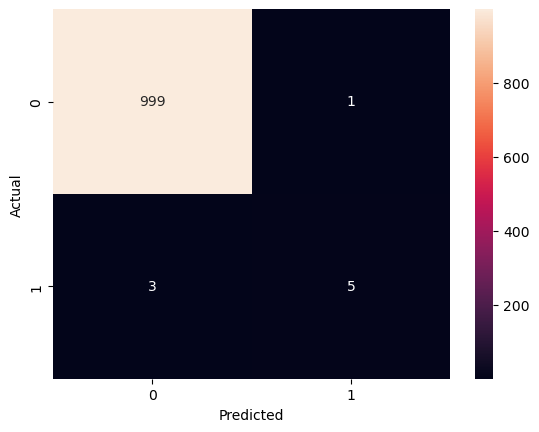

In [16]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, brier_score_loss, roc_auc_score

X = tfidfvectorizer_s
y = df['label']

from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# xgbc
xgbc = xgb.XGBClassifier(random_state=1)

# Fit the model with early stopping
eval_set = [(X_val, y_val)]
xgbc.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

# Get predictions and the probabilistic predictions for the positive class
y_pred = xgbc.predict(X_test)
y_probs = xgbc.predict_proba(X_test)[:, 1]

# eval
brier_score1 = brier_score_loss(y_test, y_probs)
print("Brier score:", brier_score1)
roc_auc1 = roc_auc_score(y_test, y_probs)
print("ROC AUC on test:", roc_auc1)
print()
report1 = classification_report(y_test, y_pred, output_dict=True)
print("\nClassification Report:\n", report1)
print()
print('***Confusion Matrix***')
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(sns.heatmap(conf_matrix, annot=True, fmt="d"))

#### Text mining on topic-related articles

Topic modeling to find out what is commonly mentioned in these articles.

In [17]:
# Remove punctuation from abstracts
abs_no_punc = [''.join(c for c in w if c not in punctuation) for w in merged_df.abstract]

# Tokenize abstracts into words
tokenized_abstract = [word_tokenize(abstract) for abstract in abs_no_punc]

# Remove stopwords from each abstract
abs_no_sw = [
    ' '.join([w for w in abstract_tokens if w.lower() not in sw])
    for abstract_tokens in tokenized_abstract
]

# Lemmatizer
abstract_lemmatized = [
    ' '.join([lemmatizer.lemmatize(word) for word in abstract.split()])
    for abstract in abs_no_sw
]

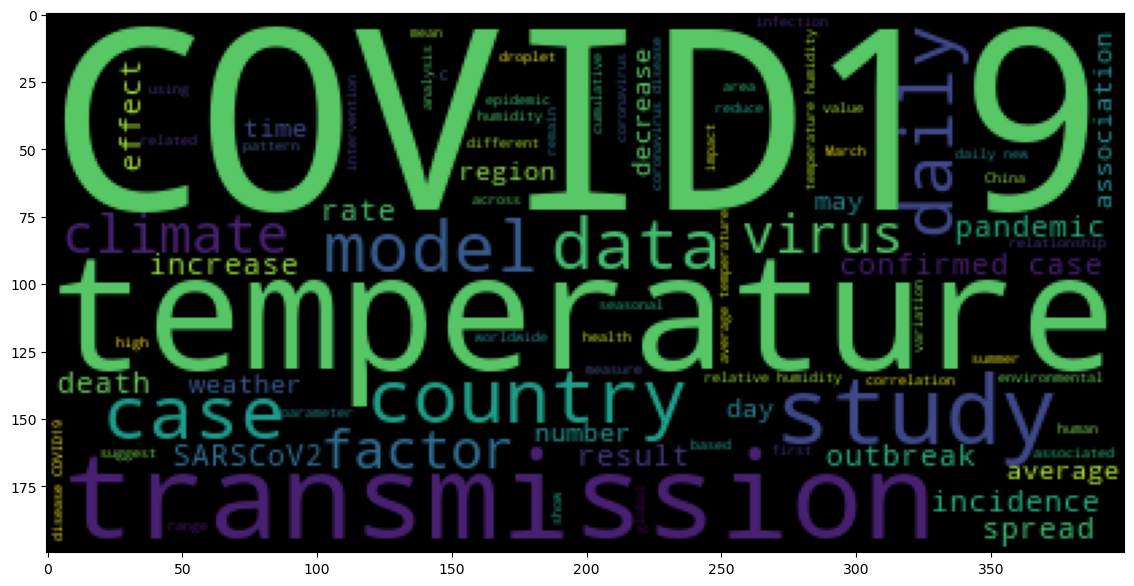

In [18]:
# visualize the words with word cloud

from wordcloud import WordCloud
wc = WordCloud(
    background_color='black',
    max_words=100,
    random_state=42,
    max_font_size=110
)
wc.generate(' '.join(abstract_lemmatized))
plt.figure(figsize=(50, 7))
plt.imshow(wc)
plt.show()

FInd the most frequent appeared words

In [19]:
import nltk

combined_text = ' '.join(abstract_lemmatized)
words = word_tokenize(combined_text) # Tokenize into words
vocab = nltk.FreqDist(words)
print(vocab.most_common(50))

[('temperature', 124), ('COVID19', 121), ('case', 71), ('rate', 49), ('humidity', 44), ('country', 43), ('daily', 43), ('transmission', 41), ('factor', 37), ('study', 37), ('confirmed', 34), ('model', 34), ('spread', 33), ('average', 32), ('disease', 31), ('data', 29), ('climate', 29), ('death', 28), ('2020', 27), ('virus', 27), ('incidence', 26), ('new', 26), ('effect', 24), ('weather', 24), ('outbreak', 24), ('pandemic', 23), ('increase', 22), ('coronavirus', 21), ('region', 20), ('number', 20), ('SARSCoV2', 20), ('relative', 19), ('China', 19), ('infection', 19), ('decrease', 19), ('day', 19), ('time', 18), ('droplet', 18), ('health', 17), ('parameter', 17), ('correlation', 17), ('growth', 17), ('association', 17), ('relationship', 16), ('epidemic', 16), ('meteorological', 16), ('may', 16), ('°C', 15), ('measure', 15), ('seasonal', 15)]


In [20]:
import gensim
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models import CoherenceModel

# Topic modeling 
documents = [abstract.split() for abstract in abstract_lemmatized]

# Create a dictionary from documents
dictionary = Dictionary(documents)

# Create a corpus
corpus = [dictionary.doc2bow(doc) for doc in documents]

# build lda_model

lda_model = LdaMulticore(
    corpus=corpus,
    id2word=dictionary,
    num_topics=10,
    workers=3,
    passes=10,
    random_state=42
)

# Explore the words occurring in each topic and their relative weight
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 

Words: 0.015*"COVID19" + 0.012*"temperature" + 0.012*"rate" + 0.012*"high" + 0.009*"weather" + 0.009*"value" + 0.009*"latitude" + 0.009*"hemisphere" + 0.006*"study" + 0.006*"droplet"





Topic: 1 

Words: 0.023*"rate" + 0.023*"COVID19" + 0.018*"temperature" + 0.016*"growth" + 0.009*"spread" + 0.008*"weather" + 0.008*"intervention" + 0.008*"summer" + 0.008*"based" + 0.008*"found"





Topic: 2 

Words: 0.023*"temperature" + 0.021*"case" + 0.010*"CF" + 0.009*"day" + 0.009*"COVID19" + 0.008*"incidence" + 0.007*"first" + 0.007*"country" + 0.007*"RH" + 0.007*"cell"





Topic: 3 

Words: 0.018*"Covid19" + 0.012*"transmission" + 0.011*"temperature" + 0.011*"measure" + 0.011*"growth" + 0.011*"epidemic" + 0.010*"humidity" + 0.010*"rate" + 0.010*"outbreak" + 0.009*"region"





Topic: 4 

Words: 0.021*"weather" + 0.019*"temperature" + 0.016*"droplet" + 0.013*"condition" + 0.011*"covid19" + 0.011*"Indonesia" + 0.011*"°C" + 0.011*"aerosol" + 0.011*"humidity" + 0.011*"study"





Topic

In [21]:
# Calculate the average topic coherence
top_topics = lda_model.top_topics(corpus)
num_topics = 10
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))

Average topic coherence: -2.8597.



Perplexity:  -7.136856549787695


In [22]:
# Visualize the LDA model

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.152131 -0.036297       1        1  31.941979
6      0.035689 -0.100838       2        1  18.467266
2     -0.069657  0.108921       3        1  13.614733
9     -0.102580 -0.004314       4        1   8.651921
8      0.067818  0.125494       5        1   7.397766
3      0.053386 -0.036239       6        1   7.169984
4      0.026445 -0.054585       7        1   4.342159
1      0.049038 -0.002431       8        1   4.211684
0      0.039231 -0.014251       9        1   3.654240
5      0.052760  0.014541      10        1   0.548267, topic_info=                                       Term       Freq      Total Category  \
62                                  COVID19  96.000000  96.000000  Default   
32                                     rate  36.000000  36.000000  Default   
92                                    death  23.000000  23.000000  Default   
270                                 weather  16.000000  16.000000  Default   
42                              temperature  97.000000  97.000000  Default   
63                                    China  14.000000  14.000000  Default   
326                                  growth  12.000000  12.000000  Default   
26                                incidence  19.000000  19.000000  Default   
200                                 climate  22.000000  22.000000  Default   
7                                    across   7.000000   7.000000  Default   
604                                 droplet  13.000000  13.000000  Default   
155                                      °C  11.000000  11.000000  Default   
123                                pandemic  18.000000  18.000000  Default   
4                                   Covid19   8.000000   8.000000  Default   
91                                    daily  38.000000  38.000000  Default   
450                                SARSCoV2  15.000000  15.000000  Default   
97                                 epidemic  12.000000  12.000000  Default   
145                                  spread  25.000000  25.000000  Default   
83                                condition  10.000000  10.000000  Default   
154                                   world   7.000000   7.000000  Default   
287                             correlation  13.000000  13.000000  Default   
41                                    study  29.000000  29.000000  Default   
284                                 average  28.000000  28.000000  Default   
226                                    high  10.000000  10.000000  Default   
456                              hemisphere   5.000000   5.000000  Default   
150                            transmission  32.000000  32.000000  Default   
451                                 ambient   6.000000   6.000000  Default   
817                                    area   8.000000   8.000000  Default   
333                                outbreak  18.000000  18.000000  Default   
17                                  country  36.000000  36.000000  Default   
1506                               pressure   7.274839   7.830036   Topic1   
414                                    city   7.272384   7.829087   Topic1   
383                               mortality   7.229579   7.811822   Topic1   
875                                   Hubei   6.375192   6.930506   Topic1   
117                          meteorological  13.553661  14.964472   Topic1   
868                                     ARH   4.577473   5.131876   Topic1   
403                                  Brazil   4.577616   5.133032   Topic1   
393                                    unit   4.562072   5.125363   Topic1   
286                              correlated   9.044065  10.185497   Topic1   
1588                                   P001   3.682580   4.233856   Topic1   
1514                                  vapor   3.682214   4.234236   Topic1   
1515                             

From the word cloud and topic modeling, it does seem like the **climate, temperature, humidity, weather** is strongly associated with covid's spread, transmission and outbreak, but I do not know whether the transmission is associated with, for example, high or low temperature, so the reliability of these identified topics are not high enough.

### RoBERTa

In [23]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [24]:
# define X and y

X = df['abstract'].tolist()
y = df['label'].tolist()

# train test split
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [25]:
# Tokenize the Xs 

from transformers import RobertaTokenizer, RobertaForSequenceClassification

# Load RoBERTa tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)

def tokenize_sentences(sentences, tokenizer, max_length=256):
    return tokenizer(sentences, padding='max_length', truncation=True, max_length=max_length, return_tensors="pt")

tokenized_train = tokenize_sentences(X_train, tokenizer)
tokenized_val = tokenize_sentences(X_val, tokenizer)
tokenized_test = tokenize_sentences(X_test, tokenizer)

from torch.utils.data import Dataset

# adds labels to the tokenized data dictionaries for each data point
class CustomDataset(Dataset):
    # Initializes the dataset object with X and y
    def __init__(self, tokenized_data, labels): # corresponds to CustomDataset(tokenized_train, y_train)
        """
        tokenized_data: A dictionary containing tokenized text data (X).
        labels: A list of integer labels corresponding to each item of text data (y).
        """
        self.tokenized_data = tokenized_data  # Xs
        self.labels = labels  # ys

    # let PyTorch know the size of the dataset for batching, iterating, and other data handling operations
    def __len__(self):
        """
        Returns the number of items in the dataset.
        """
        return len(self.labels)  # The length is based on the number of labels

    # Retrieves a single item from the dataset by index
    def __getitem__(self, idx):
        """
        idx: Index of the data item to retrieve.
        
        Returns a dictionary containing the tokenized data and its corresponding label,
        both formatted as tensors. This format is compatible with PyTorch models.
        """
        # Retrieve tokenized X for the specified index and convert to tensors
        item = {key: torch.tensor(val[idx]) for key, val in self.tokenized_data.items()}
        # Retrieve the label for the specified index, convert to a long tensor
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        
        return item

train = CustomDataset(tokenized_train, y_train)
val = CustomDataset(tokenized_val, y_val)
test = CustomDataset(tokenized_test, y_test)

from transformers import Trainer, TrainingArguments

# Define the training arguments
training_args = TrainingArguments(
    output_dir='./results',
    per_device_train_batch_size=16,
    num_train_epochs=30,
    logging_dir='./logs',
    evaluation_strategy="epoch",  # Evaluate at the end of each epoch
    logging_strategy="epoch",  # Log training information at the end of each epoch
    save_strategy="epoch", # Align with evaluation strategy
    load_best_model_at_end=True,  # load the best model at the end of training (early-stopping)
    metric_for_best_model='eval_loss', # Specify which metric to monitor
    weight_decay=0.01, # L2 ridge regularization
)

C:\Users\Debbie\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\framework\dtypes.py:246: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)

  np.bool8: (False, True),

C:\Users\Debbie\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:326: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)

  np.bool8: (False, True),

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'roberta.pooler.dense.bias']

- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertF

In [34]:
# Create a Trainer instance
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train,
    eval_dataset=val,
)

# Train the model
trainer.train()

C:\Users\Debbie\anaconda3\lib\site-packages\torch\utils\tensorboard\__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.

  if not hasattr(tensorboard, "__version__") or LooseVersion(

C:\Users\Debbie\anaconda3\lib\site-packages\torch\utils\tensorboard\__init__.py:6: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.

  ) < LooseVersion("1.15"):

C:\Users\Debbie\anaconda3\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning

  warnings.warn(

***** Running training *****

  Num examples = 3021

  Num Epochs = 30

  Instantaneous batch size per device = 16

  Total train batch size (w. parallel, distributed & accumulation) = 16

  Gradient Accumulation steps = 1

  Total optimiz

Epoch,Training Loss,Validation Loss
1,0.051000,0.073126
2,0.037500,0.070399
3,0.036500,0.068256
4,0.037100,0.060073
5,0.036600,0.065759
6,0.025800,0.076322
7,0.038200,0.064775
8,0.036100,0.075754
9,0.037100,0.067082
10,0.036600,0.072055


***** Running Evaluation *****

  Num examples = 1007

  Batch size = 8

Saving model checkpoint to ./results\checkpoint-189

Configuration saved in ./results\checkpoint-189\config.json

Model weights saved in ./results\checkpoint-189\pytorch_model.bin

C:\Users\Debbie\AppData\Local\Temp\ipykernel_29596\349069510.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

  item = {key: torch.tensor(val[idx]) for key, val in self.tokenized_data.items()}

***** Running Evaluation *****

  Num examples = 1007

  Batch size = 8

Saving model checkpoint to ./results\checkpoint-378

Configuration saved in ./results\checkpoint-378\config.json

Model weights saved in ./results\checkpoint-378\pytorch_model.bin

C:\Users\Debbie\AppData\Local\Temp\ipykernel_29596\349069510.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sour

TrainOutput(global_step=5670, training_loss=0.03313440270524807, metrics={'train_runtime': 1031.1186, 'train_samples_per_second': 87.895, 'train_steps_per_second': 5.499, 'total_flos': 1.19228774736384e+16, 'train_loss': 0.03313440270524807, 'epoch': 30.0})

Notes: 
- Train and val loss should be as close as possible, and both should be decreasing over epochs. When val loss is **much higher** than train loss, there could be overfitting. Model is learning the training data too well, so apply **regularization (only L2 here) or Reduce Model Complexity**. drop out and early stopping are already integrated in roberta.

In [26]:
model_path = "./saved_model"
tokenizer_path = "./saved_tokenizer"

In [36]:
# Save the trained model and the tokenizer
model.save_pretrained(model_path)
tokenizer.save_pretrained(tokenizer_path)

Configuration saved in ./saved_model\config.json

Model weights saved in ./saved_model\pytorch_model.bin

tokenizer config file saved in ./saved_tokenizer\tokenizer_config.json

Special tokens file saved in ./saved_tokenizer\special_tokens_map.json


('./saved_tokenizer\\tokenizer_config.json',
 './saved_tokenizer\\special_tokens_map.json',
 './saved_tokenizer\\vocab.json',
 './saved_tokenizer\\merges.txt',
 './saved_tokenizer\\added_tokens.json')

In [27]:
# use pretrained model to train test set

# load the saved model and tokenizer
loaded_tokenizer = RobertaTokenizer.from_pretrained(tokenizer_path)
loaded_model = RobertaForSequenceClassification.from_pretrained(model_path).to(device)

# set up a new Trainer instance using the previously saved model 
loaded_trainer = Trainer(
    model=loaded_model,
    args=training_args,
    eval_dataset=test  # Using the test dataset for evaluation
)

# eval the pre-trained model
results = loaded_trainer.evaluate()
print(results)

C:\Users\Debbie\anaconda3\lib\site-packages\torch\utils\tensorboard\__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.

  if not hasattr(tensorboard, "__version__") or LooseVersion(

C:\Users\Debbie\anaconda3\lib\site-packages\torch\utils\tensorboard\__init__.py:6: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.

  ) < LooseVersion("1.15"):

***** Running Evaluation *****

  Num examples = 1008

  Batch size = 8

C:\Users\Debbie\AppData\Local\Temp\ipykernel_27272\3008646059.py:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

  item = {key: torch.tensor(val[idx]) for key, val in self.tokenized_data.items()}


{'eval_loss': 0.023572184145450592, 'eval_runtime': 4.412, 'eval_samples_per_second': 228.47, 'eval_steps_per_second': 28.559}


***** Running Prediction *****

  Num examples = 1008

  Batch size = 8

C:\Users\Debbie\AppData\Local\Temp\ipykernel_27272\3008646059.py:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

  item = {key: torch.tensor(val[idx]) for key, val in self.tokenized_data.items()}


Brier score: 0.00331948782012104

ROC AUC on test: 0.8125





Classification Report:

 {'0': {'precision': 0.9970089730807578, 'recall': 1.0, 'f1-score': 0.9985022466300548, 'support': 1000.0}, '1': {'precision': 1.0, 'recall': 0.625, 'f1-score': 0.7692307692307693, 'support': 8.0}, 'accuracy': 0.9970238095238095, 'macro avg': {'precision': 0.9985044865403789, 'recall': 0.8125, 'f1-score': 0.883866507930412, 'support': 1008.0}, 'weighted avg': {'precision': 0.9970327113896407, 'recall': 0.9970238095238095, 'f1-score': 0.9966826317300606, 'support': 1008.0}}



***Confusion Matrix***

Axes(0.125,0.11;0.62x0.77)


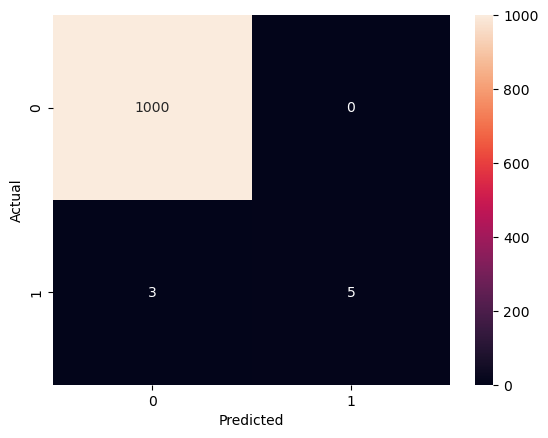

In [28]:
# Function to produce predicted values
def get_predictions(trainer, eval_dataset):
    predictions = trainer.predict(eval_dataset)
    y_pred = np.argmax(predictions.predictions, axis=-1)
    y_probs = predictions.predictions[:, 1] # produce the prediction tensors and select only the positive class
    y_probs = np.clip(y_probs, 0, 1) # make sure the values are between 0 and 1
    y_true = predictions.label_ids
    return y_pred, y_probs, y_true

y_pred, y_probs, y_true = get_predictions(loaded_trainer, test)

# eval
brier_score2 = brier_score_loss(y_true, y_probs)
print("Brier score:", brier_score2)
roc_auc2 = roc_auc_score(y_true, y_probs)
print("ROC AUC on test:", roc_auc2)
print()
report2 = classification_report(y_true, y_pred, output_dict=True)
print("\nClassification Report:\n", report2)
print()
print('***Confusion Matrix***')
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(sns.heatmap(conf_matrix, annot=True, fmt="d"))

#### Performance Comparison

In [29]:
# Function to extract F1 scores
def get_f1(report):
    return round(report['0']['f1-score'], 2), round(report['1']['f1-score'], 2)

f1_1 = get_f1(report1)
f1_2 = get_f1(report2)

metrics_df = pd.DataFrame({
    'Metric': ['Class 0 F1 Score', 'Class 1 F1 Score', 'Brier Score', 'ROC AUC'],
    'XGBoost': [f1_1[0], f1_1[1], round(brier_score1, 2), round(roc_auc1,2)],
    'Roberta': [f1_2[0], f1_1[1], round(brier_score2, 2), round(roc_auc2,2)]
}).set_index('Metric')

display(metrics_df)

,XGBoost,Roberta
Metric,,
Class 0 F1 Score,1.00,1.00
Class 1 F1 Score,0.71,0.71
Brier Score,0.00,0.00
ROC AUC,1.00,0.81


### BART

In [30]:
from transformers import BartTokenizer, BartForSequenceClassification
from torch.utils.data import Dataset

# Define X and y
X = df['abstract'].tolist()
y = df['label'].tolist()

# Train test split
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Load BART tokenizer and model
tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')
model = BartForSequenceClassification.from_pretrained('facebook/bart-base', num_labels=2)

# Tokenize the Xs
def tokenize_sentences(sentences, tokenizer, max_length=256):
    return tokenizer(sentences, padding='max_length', truncation=True, max_length=max_length, return_tensors="pt")

tokenized_train = tokenize_sentences(X_train, tokenizer)
tokenized_val = tokenize_sentences(X_val, tokenizer)
tokenized_test = tokenize_sentences(X_test, tokenizer)

# Customdataset class
class CustomDataset(Dataset):
    def __init__(self, tokenized_data, labels):
        self.tokenized_data = tokenized_data
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.tokenized_data.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

train = CustomDataset(tokenized_train, y_train)
val = CustomDataset(tokenized_val, y_val)
test = CustomDataset(tokenized_test, y_test)

from transformers import Trainer, TrainingArguments

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    per_device_train_batch_size=8,
    num_train_epochs=10,
    logging_dir='./logs',
    evaluation_strategy="epoch",
    logging_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model='eval_loss',
    weight_decay=0.01,
)

loading file vocab.json from cache at C:\Users\Debbie/.cache\huggingface\hub\models--facebook--bart-base\snapshots\aadd2ab0ae0c8268c7c9693540e9904811f36177\vocab.json

loading file merges.txt from cache at C:\Users\Debbie/.cache\huggingface\hub\models--facebook--bart-base\snapshots\aadd2ab0ae0c8268c7c9693540e9904811f36177\merges.txt

loading file added_tokens.json from cache at None

loading file special_tokens_map.json from cache at None

loading file tokenizer_config.json from cache at None

loading configuration file config.json from cache at C:\Users\Debbie/.cache\huggingface\hub\models--facebook--bart-base\snapshots\aadd2ab0ae0c8268c7c9693540e9904811f36177\config.json

Model config BartConfig {

  "_name_or_path": "facebook/bart-base",

  "activation_dropout": 0.1,

  "activation_function": "gelu",

  "add_bias_logits": false,

  "add_final_layer_norm": false,

  "architectures": [

    "BartModel"

  ],

  "attention_dropout": 0.1,

  "bos_token_id": 0,

  "classif_dropout": 0.1,

In [28]:
# Create a Trainer instance
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train,
    eval_dataset=val,
)

# Train the model
trainer.train()

***** Running training *****

  Num examples = 3021

  Num Epochs = 10

  Instantaneous batch size per device = 8

  Total train batch size (w. parallel, distributed & accumulation) = 8

  Gradient Accumulation steps = 1

  Total optimization steps = 3780

  Number of trainable parameters = 140012546

C:\Users\Debbie\AppData\Local\Temp\ipykernel_10820\2805233358.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

  item = {key: torch.tensor(val[idx]) for key, val in self.tokenized_data.items()}


Epoch,Training Loss,Validation Loss
1,0.047400,0.063987
2,0.040000,0.078885
3,0.040600,0.078061
4,0.039700,0.070423
5,0.039100,0.076360
6,0.038900,0.076185
7,0.036900,0.051562
8,0.023100,0.069879
9,0.012800,0.018177
10,0.004900,0.027231


***** Running Evaluation *****

  Num examples = 1007

  Batch size = 8

Saving model checkpoint to ./results\checkpoint-378

Configuration saved in ./results\checkpoint-378\config.json

Model weights saved in ./results\checkpoint-378\pytorch_model.bin

C:\Users\Debbie\AppData\Local\Temp\ipykernel_10820\2805233358.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

  item = {key: torch.tensor(val[idx]) for key, val in self.tokenized_data.items()}

***** Running Evaluation *****

  Num examples = 1007

  Batch size = 8

Saving model checkpoint to ./results\checkpoint-756

Configuration saved in ./results\checkpoint-756\config.json

Model weights saved in ./results\checkpoint-756\pytorch_model.bin

C:\Users\Debbie\AppData\Local\Temp\ipykernel_10820\2805233358.py:35: UserWarning: To copy construct from a tensor, it is recommended to use so

TrainOutput(global_step=3780, training_loss=0.032323829774503356, metrics={'train_runtime': 439.6592, 'train_samples_per_second': 68.712, 'train_steps_per_second': 8.598, 'total_flos': 4632510948710400.0, 'train_loss': 0.032323829774503356, 'epoch': 10.0})

In [31]:
# use pretrained model to train test set
# Save the trained model and the tokenizer
model_path = "./saved_model3"
tokenizer_path = "./saved_tokenizer3"

In [29]:
model.save_pretrained(model_path)
tokenizer.save_pretrained(tokenizer_path)

Configuration saved in ./saved_model3\config.json

Model weights saved in ./saved_model3\pytorch_model.bin

tokenizer config file saved in ./saved_tokenizer3\tokenizer_config.json

Special tokens file saved in ./saved_tokenizer3\special_tokens_map.json


('./saved_tokenizer3\\tokenizer_config.json',
 './saved_tokenizer3\\special_tokens_map.json',
 './saved_tokenizer3\\vocab.json',
 './saved_tokenizer3\\merges.txt',
 './saved_tokenizer3\\added_tokens.json')

In [32]:
# load the saved model and tokenizer
loaded_tokenizer = BartTokenizer.from_pretrained(tokenizer_path)
loaded_model = BartForSequenceClassification.from_pretrained(model_path).to(device)

# set up a new Trainer instance using the previously saved model 
loaded_trainer = Trainer(
    model=loaded_model,
    args=training_args,
    eval_dataset=test  # Using the test dataset for evaluation
)

# eval the pre-trained model
results = loaded_trainer.evaluate()
print(results)

loading file vocab.json

loading file merges.txt

loading file added_tokens.json

loading file special_tokens_map.json

loading file tokenizer_config.json

loading configuration file ./saved_model3\config.json

You passed along `num_labels=3` with an incompatible id to label map: {'0': 'LABEL_0', '1': 'LABEL_1'}. The number of labels wil be overwritten to 2.

Model config BartConfig {

  "_name_or_path": "facebook/bart-base",

  "activation_dropout": 0.1,

  "activation_function": "gelu",

  "add_bias_logits": false,

  "add_final_layer_norm": false,

  "architectures": [

    "BartForSequenceClassification"

  ],

  "attention_dropout": 0.1,

  "bos_token_id": 0,

  "classif_dropout": 0.1,

  "classifier_dropout": 0.0,

  "d_model": 768,

  "decoder_attention_heads": 12,

  "decoder_ffn_dim": 3072,

  "decoder_layerdrop": 0.0,

  "decoder_layers": 6,

  "decoder_start_token_id": 2,

  "dropout": 0.1,

  "early_stopping": true,

  "encoder_attention_heads": 12,

  "encoder_ffn_dim": 30

{'eval_loss': 0.01074193511158228, 'eval_runtime': 3.2839, 'eval_samples_per_second': 306.949, 'eval_steps_per_second': 38.369}


***** Running Prediction *****

  Num examples = 1008

  Batch size = 8

C:\Users\Debbie\AppData\Local\Temp\ipykernel_27272\1546919255.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

  item = {key: torch.tensor(val[idx]) for key, val in self.tokenized_data.items()}


Brier score: 0.002686538009159963

ROC AUC on test: 0.875





Classification Report:

 {'0': {'precision': 0.9970089730807578, 'recall': 1.0, 'f1-score': 0.9985022466300548, 'support': 1000.0}, '1': {'precision': 1.0, 'recall': 0.625, 'f1-score': 0.7692307692307693, 'support': 8.0}, 'accuracy': 0.9970238095238095, 'macro avg': {'precision': 0.9985044865403789, 'recall': 0.8125, 'f1-score': 0.883866507930412, 'support': 1008.0}, 'weighted avg': {'precision': 0.9970327113896407, 'recall': 0.9970238095238095, 'f1-score': 0.9966826317300606, 'support': 1008.0}}



***Confusion Matrix***

Axes(0.125,0.11;0.62x0.77)


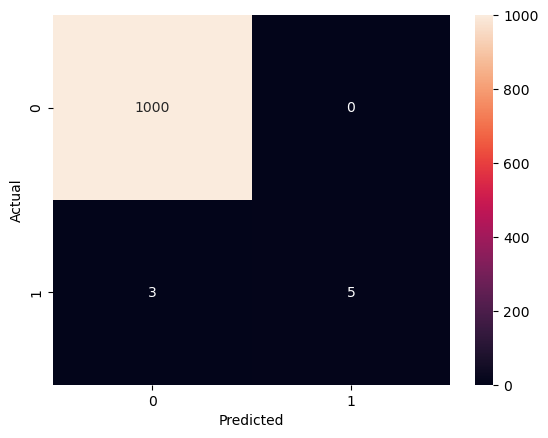

In [33]:
# Function to produce predicted values
def get_predictions(trainer, eval_dataset):
    predictions = trainer.predict(eval_dataset)
    logits = predictions.predictions[0]  # selects only the logits. it's 2D array, because we only 2 classes
    y_pred = np.argmax(logits, axis=-1) # axis=-1 compare elements of each row, np.argmax suggests that the largest element becomes the prediction class
    y_probs = logits[:, 1]  # get the probs of class 1 only (2nd column)
    y_probs = np.clip(y_probs, 0, 1)  # then ensure probabilities are within [0, 1]
    y_true = predictions.label_ids
    return y_pred, y_probs, y_true

y_pred, y_probs, y_true = get_predictions(loaded_trainer, test)

# eval
brier_score3 = brier_score_loss(y_true, y_probs)
print("Brier score:", brier_score3)
roc_auc3 = roc_auc_score(y_true, y_probs)
print("ROC AUC on test:", roc_auc3)
print()
report3 = classification_report(y_true, y_pred, output_dict=True)
print("\nClassification Report:\n", report3)
print()
print('***Confusion Matrix***')
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(sns.heatmap(conf_matrix, annot=True, fmt="d"))

#### Performance Comparison

In [34]:
f1_3 = get_f1(report3)

metrics_df = pd.DataFrame({
    'Metric': ['Class 0 F1 Score', 'Class 1 F1 Score', 'Brier Score', 'ROC AUC'],
    'XGBoost': [f1_1[0], f1_1[1], round(brier_score1, 3), round(roc_auc1,3)],
    'Roberta': [f1_2[0], f1_2[1], round(brier_score2, 3), round(roc_auc2,3)],
    'BART': [f1_3[0], f1_3[1], round(brier_score3, 3), round(roc_auc3,3)]
}).set_index('Metric')

display(metrics_df)

,XGBoost,Roberta,BART
Metric,,,
Class 0 F1 Score,1.000,1.000,1.000
Class 1 F1 Score,0.710,0.770,0.770
Brier Score,0.003,0.003,0.003
ROC AUC,0.997,0.812,0.875


### DistilBERT

In [35]:
# define X and y

X = df['abstract'].tolist()
y = df['label'].tolist()

# train test split
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Tokenize the Xs 

from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

# Load DistilBERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

def tokenize_sentences(sentences, tokenizer, max_length=256):
    return tokenizer(sentences, padding='max_length', truncation=True, max_length=max_length, return_tensors="pt")

tokenized_train = tokenize_sentences(X_train, tokenizer)
tokenized_val = tokenize_sentences(X_val, tokenizer)
tokenized_test = tokenize_sentences(X_test, tokenizer)

from torch.utils.data import Dataset

# adds labels to the tokenized data dictionaries for each data point
class CustomDataset(Dataset):
    # Initializes the dataset object with X and y
    def __init__(self, tokenized_data, labels): # corresponds to CustomDataset(tokenized_train, y_train)
        """
        tokenized_data: A dictionary containing tokenized text data (X).
        labels: A list of integer labels corresponding to each item of text data (y).
        """
        self.tokenized_data = tokenized_data  # Xs
        self.labels = labels  # ys

    # let PyTorch know the size of the dataset for batching, iterating, and other data handling operations
    def __len__(self):
        """
        Returns the number of items in the dataset.
        """
        return len(self.labels)  # The length is based on the number of labels

    # Retrieves a single item from the dataset by index
    def __getitem__(self, idx):
        """
        idx: Index of the data item to retrieve.
        
        Returns a dictionary containing the tokenized data and its corresponding label,
        both formatted as tensors. This format is compatible with PyTorch models.
        """
        # Retrieve tokenized X for the specified index and convert to tensors
        item = {key: torch.tensor(val[idx]) for key, val in self.tokenized_data.items()}
        # Retrieve the label for the specified index, convert to a long tensor
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        
        return item

train = CustomDataset(tokenized_train, y_train)
val = CustomDataset(tokenized_val, y_val)
test = CustomDataset(tokenized_test, y_test)

from transformers import Trainer, TrainingArguments

# Define the training arguments
training_args = TrainingArguments(
    output_dir='./results',
    per_device_train_batch_size=16,
    num_train_epochs=30,
    logging_dir='./logs',
    evaluation_strategy="epoch",  # Evaluate at the end of each epoch
    logging_strategy="epoch",  # Log training information at the end of each epoch
    save_strategy="epoch", # Align with evaluation strategy
    load_best_model_at_end=True,  # load the best model at the end of training (early-stopping)
    metric_for_best_model='eval_loss', # Specify which metric to monitor
    weight_decay=0.01, # L2 ridge regularization
)

loading file vocab.txt from cache at C:\Users\Debbie/.cache\huggingface\hub\models--distilbert-base-uncased\snapshots\6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411\vocab.txt

loading file added_tokens.json from cache at None

loading file special_tokens_map.json from cache at None

loading file tokenizer_config.json from cache at C:\Users\Debbie/.cache\huggingface\hub\models--distilbert-base-uncased\snapshots\6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411\tokenizer_config.json

loading configuration file config.json from cache at C:\Users\Debbie/.cache\huggingface\hub\models--distilbert-base-uncased\snapshots\6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411\config.json

Model config DistilBertConfig {

  "_name_or_path": "distilbert-base-uncased",

  "activation": "gelu",

  "architectures": [

    "DistilBertForMaskedLM"

  ],

  "attention_dropout": 0.1,

  "dim": 768,

  "dropout": 0.1,

  "hidden_dim": 3072,

  "initializer_range": 0.02,

  "max_position_embeddings": 512,

  "model_type": "distilbert

In [68]:
# Create a Trainer instance
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train,
    eval_dataset=val,
)

# Train the model
trainer.train()

C:\Users\Debbie\anaconda3\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning

  warnings.warn(

***** Running training *****

  Num examples = 3021

  Num Epochs = 30

  Instantaneous batch size per device = 16

  Total train batch size (w. parallel, distributed & accumulation) = 16

  Gradient Accumulation steps = 1

  Total optimization steps = 5670

  Number of trainable parameters = 66955010

C:\Users\Debbie\AppData\Local\Temp\ipykernel_29596\2013001166.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

  item = {key: torch.tensor(val[idx]) for key, val in self.tokenized_data.items()}


Epoch,Training Loss,Validation Loss
1,0.047800,0.056878
2,0.025100,0.054080
3,0.017800,0.073627
4,0.003800,0.025693
5,0.000200,0.069319
6,0.000100,0.072139
7,0.000000,0.074416
8,0.000000,0.076377
9,0.000000,0.078118
10,0.000000,0.079635


***** Running Evaluation *****

  Num examples = 1007

  Batch size = 8

Saving model checkpoint to ./results\checkpoint-189

Configuration saved in ./results\checkpoint-189\config.json

Model weights saved in ./results\checkpoint-189\pytorch_model.bin

C:\Users\Debbie\AppData\Local\Temp\ipykernel_29596\2013001166.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

  item = {key: torch.tensor(val[idx]) for key, val in self.tokenized_data.items()}

***** Running Evaluation *****

  Num examples = 1007

  Batch size = 8

Saving model checkpoint to ./results\checkpoint-378

Configuration saved in ./results\checkpoint-378\config.json

Model weights saved in ./results\checkpoint-378\pytorch_model.bin

C:\Users\Debbie\AppData\Local\Temp\ipykernel_29596\2013001166.py:55: UserWarning: To copy construct from a tensor, it is recommended to use so

TrainOutput(global_step=5670, training_loss=0.0031638168122510983, metrics={'train_runtime': 566.9178, 'train_samples_per_second': 159.864, 'train_steps_per_second': 10.001, 'total_flos': 6002760170096640.0, 'train_loss': 0.0031638168122510983, 'epoch': 30.0})

In [36]:
# use pretrained model to train test set
# Save the trained model and the tokenizer
model_path = "./saved_model4"
tokenizer_path = "./saved_tokenizer4"

In [70]:
model.save_pretrained(model_path)
tokenizer.save_pretrained(tokenizer_path)

Configuration saved in ./saved_model4\config.json

Model weights saved in ./saved_model4\pytorch_model.bin

tokenizer config file saved in ./saved_tokenizer4\tokenizer_config.json

Special tokens file saved in ./saved_tokenizer4\special_tokens_map.json


('./saved_tokenizer4\\tokenizer_config.json',
 './saved_tokenizer4\\special_tokens_map.json',
 './saved_tokenizer4\\vocab.txt',
 './saved_tokenizer4\\added_tokens.json')

In [37]:
# load the saved model and tokenizer
loaded_tokenizer = DistilBertTokenizer.from_pretrained(tokenizer_path)
loaded_model = DistilBertForSequenceClassification.from_pretrained(model_path).to(device)

# set up a new Trainer instance using the previously saved model 
loaded_trainer = Trainer(
    model=loaded_model,
    args=training_args,
    eval_dataset=test  # Using the test dataset for evaluation
)

# eval the pre-trained model
results = loaded_trainer.evaluate()
print(results)

loading file vocab.txt

loading file added_tokens.json

loading file special_tokens_map.json

loading file tokenizer_config.json

loading configuration file ./saved_model4\config.json

Model config DistilBertConfig {

  "_name_or_path": "distilbert-base-uncased",

  "activation": "gelu",

  "architectures": [

    "DistilBertForSequenceClassification"

  ],

  "attention_dropout": 0.1,

  "dim": 768,

  "dropout": 0.1,

  "hidden_dim": 3072,

  "initializer_range": 0.02,

  "max_position_embeddings": 512,

  "model_type": "distilbert",

  "n_heads": 12,

  "n_layers": 6,

  "pad_token_id": 0,

  "problem_type": "single_label_classification",

  "qa_dropout": 0.1,

  "seq_classif_dropout": 0.2,

  "sinusoidal_pos_embds": false,

  "tie_weights_": true,

  "torch_dtype": "float32",

  "transformers_version": "4.24.0",

  "vocab_size": 30522

}



loading weights file ./saved_model4\pytorch_model.bin

All model checkpoint weights were used when initializing DistilBertForSequenceClassifica

{'eval_loss': 0.011884705163538456, 'eval_runtime': 1.5194, 'eval_samples_per_second': 663.419, 'eval_steps_per_second': 82.927}


***** Running Prediction *****

  Num examples = 1008

  Batch size = 8

C:\Users\Debbie\AppData\Local\Temp\ipykernel_27272\867775075.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

  item = {key: torch.tensor(val[idx]) for key, val in self.tokenized_data.items()}


Brier score: 0.00496031746031746

ROC AUC on test: 0.6875





Classification Report:

 {'0': {'precision': 0.9950248756218906, 'recall': 1.0, 'f1-score': 0.9975062344139651, 'support': 1000.0}, '1': {'precision': 1.0, 'recall': 0.375, 'f1-score': 0.5454545454545454, 'support': 8.0}, 'accuracy': 0.9950396825396826, 'macro avg': {'precision': 0.9975124378109452, 'recall': 0.6875, 'f1-score': 0.7714803899342553, 'support': 1008.0}, 'weighted avg': {'precision': 0.9950643607360026, 'recall': 0.9950396825396826, 'f1-score': 0.9939185225968269, 'support': 1008.0}}



***Confusion Matrix***

Axes(0.125,0.11;0.62x0.77)


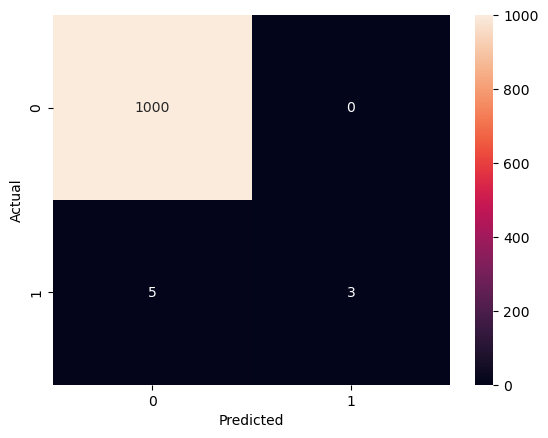

In [38]:
# Function to produce predicted values
def get_predictions(trainer, eval_dataset):
    predictions = trainer.predict(eval_dataset)
    y_pred = np.argmax(predictions.predictions, axis=-1)
    y_probs = predictions.predictions[:, 1] # produce the prediction tensors and select only the positive class
    y_probs = np.clip(y_probs, 0, 1) # make sure the values are between 0 and 1
    y_true = predictions.label_ids
    return y_pred, y_probs, y_true

y_pred, y_probs, y_true = get_predictions(loaded_trainer, test)

# eval
brier_score4 = brier_score_loss(y_true, y_probs)
print("Brier score:", brier_score4)
roc_auc4 = roc_auc_score(y_true, y_probs)
print("ROC AUC on test:", roc_auc4)
print()
report4 = classification_report(y_true, y_pred, output_dict=True)
print("\nClassification Report:\n", report4)
print()
print('***Confusion Matrix***')
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(sns.heatmap(conf_matrix, annot=True, fmt="d"))

#### Performance Comparison

In [39]:
f1_4 = get_f1(report4)

metrics_df = pd.DataFrame({
    'Metric': ['Class 0 F1 Score', 'Class 1 F1 Score', 'Brier Score', 'ROC AUC'],
    'XGBoost': [f1_1[0], f1_1[1], round(brier_score1, 3), round(roc_auc1,3)],
    'Roberta': [f1_2[0], f1_2[1], round(brier_score2, 3), round(roc_auc2,3)],
    'BART': [f1_3[0], f1_3[1], round(brier_score3, 3), round(roc_auc3,3)],
    'DistilBERT': [f1_4[0], f1_4[1], round(brier_score4, 3), round(roc_auc4,3)]
}).set_index('Metric')

display(metrics_df)

,XGBoost,Roberta,BART,DistilBERT
Metric,,,,
Class 0 F1 Score,1.000,1.000,1.000,1.000
Class 1 F1 Score,0.710,0.770,0.770,0.550
Brier Score,0.003,0.003,0.003,0.005
ROC AUC,0.997,0.812,0.875,0.688


### ELECTRA

In [40]:
# define X and y

X = df['abstract'].tolist()
y = df['label'].tolist()

# train test split
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Tokenize the Xs 
from transformers import ElectraTokenizer, ElectraForSequenceClassification

# Load ELECTRA tokenizer and model
tokenizer = ElectraTokenizer.from_pretrained('google/electra-small-discriminator')
model = ElectraForSequenceClassification.from_pretrained('google/electra-small-discriminator', num_labels=2)

def tokenize_sentences(sentences, tokenizer, max_length=256):
    return tokenizer(sentences, padding='max_length', truncation=True, max_length=max_length, return_tensors="pt")

tokenized_train = tokenize_sentences(X_train, tokenizer)
tokenized_val = tokenize_sentences(X_val, tokenizer)
tokenized_test = tokenize_sentences(X_test, tokenizer)

from torch.utils.data import Dataset

# adds labels to the tokenized data dictionaries for each data point
class CustomDataset(Dataset):
    # Initializes the dataset object with X and y
    def __init__(self, tokenized_data, labels): # corresponds to CustomDataset(tokenized_train, y_train)
        """
        tokenized_data: A dictionary containing tokenized text data (X).
        labels: A list of integer labels corresponding to each item of text data (y).
        """
        self.tokenized_data = tokenized_data  # Xs
        self.labels = labels  # ys

    # let PyTorch know the size of the dataset for batching, iterating, and other data handling operations
    def __len__(self):
        """
        Returns the number of items in the dataset.
        """
        return len(self.labels)  # The length is based on the number of labels

    # Retrieves a single item from the dataset by index
    def __getitem__(self, idx):
        """
        idx: Index of the data item to retrieve.
        
        Returns a dictionary containing the tokenized data and its corresponding label,
        both formatted as tensors. This format is compatible with PyTorch models.
        """
        # Retrieve tokenized X for the specified index and convert to tensors
        item = {key: torch.tensor(val[idx]) for key, val in self.tokenized_data.items()}
        # Retrieve the label for the specified index, convert to a long tensor
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        
        return item

train = CustomDataset(tokenized_train, y_train)
val = CustomDataset(tokenized_val, y_val)
test = CustomDataset(tokenized_test, y_test)

from transformers import Trainer, TrainingArguments

# Define the training arguments
training_args = TrainingArguments(
    output_dir='./results',
    per_device_train_batch_size=16,
    num_train_epochs=30,
    logging_dir='./logs',
    evaluation_strategy="epoch",  # Evaluate at the end of each epoch
    logging_strategy="epoch",  # Log training information at the end of each epoch
    save_strategy="epoch", # Align with evaluation strategy
    load_best_model_at_end=True,  # load the best model at the end of training (early-stopping)
    metric_for_best_model='eval_loss', # Specify which metric to monitor
    weight_decay=0.01, # L2 ridge regularization
)

loading file vocab.txt from cache at C:\Users\Debbie/.cache\huggingface\hub\models--google--electra-small-discriminator\snapshots\fa8239aadc095e9164941d05878b98afe9b953c3\vocab.txt

loading file added_tokens.json from cache at None

loading file special_tokens_map.json from cache at None

loading file tokenizer_config.json from cache at C:\Users\Debbie/.cache\huggingface\hub\models--google--electra-small-discriminator\snapshots\fa8239aadc095e9164941d05878b98afe9b953c3\tokenizer_config.json

loading configuration file config.json from cache at C:\Users\Debbie/.cache\huggingface\hub\models--google--electra-small-discriminator\snapshots\fa8239aadc095e9164941d05878b98afe9b953c3\config.json

Model config ElectraConfig {

  "_name_or_path": "google/electra-small-discriminator",

  "architectures": [

    "ElectraForPreTraining"

  ],

  "attention_probs_dropout_prob": 0.1,

  "classifier_dropout": null,

  "embedding_size": 128,

  "hidden_act": "gelu",

  "hidden_dropout_prob": 0.1,

  "hid

In [76]:
# Create a Trainer instance
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train,
    eval_dataset=val,
)

# Train the model
trainer.train()

C:\Users\Debbie\anaconda3\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning

  warnings.warn(

***** Running training *****

  Num examples = 3021

  Num Epochs = 30

  Instantaneous batch size per device = 16

  Total train batch size (w. parallel, distributed & accumulation) = 16

  Gradient Accumulation steps = 1

  Total optimization steps = 5670

  Number of trainable parameters = 13549314

C:\Users\Debbie\AppData\Local\Temp\ipykernel_29596\223755234.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

  item = {key: torch.tensor(val[idx]) for key, val in self.tokenized_data.items()}


Epoch,Training Loss,Validation Loss
1,0.119800,0.060075
2,0.035300,0.065047
3,0.030600,0.029011
4,0.015900,0.011468
5,0.007400,0.030337
6,0.004300,0.039185
7,0.000600,0.023757
8,0.000400,0.022189
9,0.000300,0.022564
10,0.000200,0.023401


***** Running Evaluation *****

  Num examples = 1007

  Batch size = 8

Saving model checkpoint to ./results\checkpoint-189

Configuration saved in ./results\checkpoint-189\config.json

Model weights saved in ./results\checkpoint-189\pytorch_model.bin

C:\Users\Debbie\AppData\Local\Temp\ipykernel_29596\223755234.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

  item = {key: torch.tensor(val[idx]) for key, val in self.tokenized_data.items()}

***** Running Evaluation *****

  Num examples = 1007

  Batch size = 8

Saving model checkpoint to ./results\checkpoint-378

Configuration saved in ./results\checkpoint-378\config.json

Model weights saved in ./results\checkpoint-378\pytorch_model.bin

C:\Users\Debbie\AppData\Local\Temp\ipykernel_29596\223755234.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sour

TrainOutput(global_step=5670, training_loss=0.00719840446202909, metrics={'train_runtime': 233.14, 'train_samples_per_second': 388.736, 'train_steps_per_second': 24.32, 'total_flos': 1333151024302080.0, 'train_loss': 0.00719840446202909, 'epoch': 30.0})

In [41]:
# use pretrained model to train test set
# Save the trained model and the tokenizer
model_path = "./saved_model5"
tokenizer_path = "./saved_tokenizer5"

In [78]:
model.save_pretrained(model_path)
tokenizer.save_pretrained(tokenizer_path)

Configuration saved in ./saved_model5\config.json

Model weights saved in ./saved_model5\pytorch_model.bin

tokenizer config file saved in ./saved_tokenizer5\tokenizer_config.json

Special tokens file saved in ./saved_tokenizer5\special_tokens_map.json


('./saved_tokenizer5\\tokenizer_config.json',
 './saved_tokenizer5\\special_tokens_map.json',
 './saved_tokenizer5\\vocab.txt',
 './saved_tokenizer5\\added_tokens.json')

In [42]:
# load the saved model and tokenizer
loaded_tokenizer = ElectraTokenizer.from_pretrained(tokenizer_path)
loaded_model = ElectraForSequenceClassification.from_pretrained(model_path).to(device)

# set up a new Trainer instance using the previously saved model 
loaded_trainer = Trainer(
    model=loaded_model,
    args=training_args,
    eval_dataset=test  # Using the test dataset for evaluation
)

# eval the pre-trained model
results = loaded_trainer.evaluate()
print(results)

loading file vocab.txt

loading file added_tokens.json

loading file special_tokens_map.json

loading file tokenizer_config.json

loading configuration file ./saved_model5\config.json

Model config ElectraConfig {

  "_name_or_path": "google/electra-small-discriminator",

  "architectures": [

    "ElectraForSequenceClassification"

  ],

  "attention_probs_dropout_prob": 0.1,

  "classifier_dropout": null,

  "embedding_size": 128,

  "hidden_act": "gelu",

  "hidden_dropout_prob": 0.1,

  "hidden_size": 256,

  "initializer_range": 0.02,

  "intermediate_size": 1024,

  "layer_norm_eps": 1e-12,

  "max_position_embeddings": 512,

  "model_type": "electra",

  "num_attention_heads": 4,

  "num_hidden_layers": 12,

  "pad_token_id": 0,

  "position_embedding_type": "absolute",

  "problem_type": "single_label_classification",

  "summary_activation": "gelu",

  "summary_last_dropout": 0.1,

  "summary_type": "first",

  "summary_use_proj": true,

  "torch_dtype": "float32",

  "transfo

{'eval_loss': 0.016140293329954147, 'eval_runtime': 1.5726, 'eval_samples_per_second': 640.968, 'eval_steps_per_second': 80.121}


***** Running Prediction *****

  Num examples = 1008

  Batch size = 8

C:\Users\Debbie\AppData\Local\Temp\ipykernel_27272\2129936356.py:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

  item = {key: torch.tensor(val[idx]) for key, val in self.tokenized_data.items()}


Brier score: 0.0038340018710179436

ROC AUC on test: 0.9983749999999999





Classification Report:

 {'0': {'precision': 1.0, 'recall': 0.992, 'f1-score': 0.9959839357429718, 'support': 1000.0}, '1': {'precision': 0.5, 'recall': 1.0, 'f1-score': 0.6666666666666666, 'support': 8.0}, 'accuracy': 0.9920634920634921, 'macro avg': {'precision': 0.75, 'recall': 0.996, 'f1-score': 0.8313253012048192, 'support': 1008.0}, 'weighted avg': {'precision': 0.996031746031746, 'recall': 0.9920634920634921, 'f1-score': 0.9933703066233187, 'support': 1008.0}}



***Confusion Matrix***

Axes(0.125,0.11;0.62x0.77)


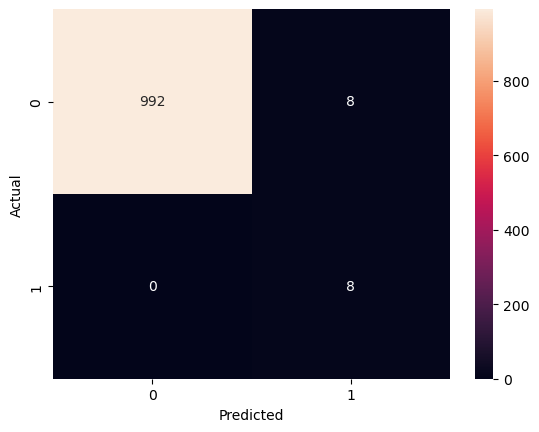

In [43]:
# Function to produce predicted values
def get_predictions(trainer, eval_dataset):
    predictions = trainer.predict(eval_dataset)
    y_pred = np.argmax(predictions.predictions, axis=-1)
    y_probs = predictions.predictions[:, 1] # produce the prediction tensors and select only the positive class
    y_probs = np.clip(y_probs, 0, 1) # make sure the values are between 0 and 1
    y_true = predictions.label_ids
    return y_pred, y_probs, y_true

y_pred, y_probs, y_true = get_predictions(loaded_trainer, test)

# eval
brier_score5 = brier_score_loss(y_true, y_probs)
print("Brier score:", brier_score5)
roc_auc5 = roc_auc_score(y_true, y_probs)
print("ROC AUC on test:", roc_auc5)
print()
report5 = classification_report(y_true, y_pred, output_dict=True)
print("\nClassification Report:\n", report5)
print()
print('***Confusion Matrix***')
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(sns.heatmap(conf_matrix, annot=True, fmt="d"))

#### Performance Comparison

In [44]:
f1_5 = get_f1(report5)

metrics_df = pd.DataFrame({
    'Metric': ['Class 0 F1 Score', 'Class 1 F1 Score', 'Brier Score', 'ROC AUC'],
    'XGBoost': [f1_1[0], f1_1[1], round(brier_score1, 3), round(roc_auc1,3)],
    'Roberta': [f1_2[0], f1_2[1], round(brier_score2, 3), round(roc_auc2,3)],
    'BART': [f1_3[0], f1_3[1], round(brier_score3, 3), round(roc_auc3,3)],
    'DistilBERT': [f1_4[0], f1_4[1], round(brier_score4, 3), round(roc_auc4,3)],
    'ELECTRA': [f1_5[0], f1_5[1], round(brier_score5, 3), round(roc_auc5,3)]
}).set_index('Metric')

display(metrics_df)

,XGBoost,Roberta,BART,DistilBERT,ELECTRA
Metric,,,,,
Class 0 F1 Score,1.000,1.000,1.000,1.000,1.000
Class 1 F1 Score,0.710,0.770,0.770,0.550,0.670
Brier Score,0.003,0.003,0.003,0.005,0.004
ROC AUC,0.997,0.812,0.875,0.688,0.998


All performed pretty well. `XGBoost`, `BART` are quite efficient.

## QA system

In [45]:
question = "How is temperature, weather, and climate, associated with covid-19 transmission and death"

Use **QA system** to narrow down to only relevant info first, then summarize.

### T5

In [46]:
from transformers import AutoTokenizer, T5ForConditionalGeneration

tokenizer = AutoTokenizer.from_pretrained("google-t5/t5-small")
model = T5ForConditionalGeneration.from_pretrained("google-t5/t5-small")

def T5_QA(question, context):
    #expanded_question = expand_with_synonyms(question)
    input_text = f"question: {question} context: {context}"
    input_ids = tokenizer.encode(input_text, return_tensors='pt', max_length=512, truncation=True)
    output = model.generate(input_ids, max_length=300, min_length=20, early_stopping=False, no_repeat_ngram_size=2, temperature=0.9, top_k=50, top_p=0.95)
    answer = tokenizer.decode(output[0], skip_special_tokens=True)
    return answer

# Test the function
context = merged_df['abstract'][0]
print(T5_QA(question, context))

loading file spiece.model from cache at C:\Users\Debbie/.cache\huggingface\hub\models--google-t5--t5-small\snapshots\df1b051c49625cf57a3d0d8d3863ed4d13564fe4\spiece.model

loading file tokenizer.json from cache at C:\Users\Debbie/.cache\huggingface\hub\models--google-t5--t5-small\snapshots\df1b051c49625cf57a3d0d8d3863ed4d13564fe4\tokenizer.json

loading file added_tokens.json from cache at None

loading file special_tokens_map.json from cache at None

loading file tokenizer_config.json from cache at C:\Users\Debbie/.cache\huggingface\hub\models--google-t5--t5-small\snapshots\df1b051c49625cf57a3d0d8d3863ed4d13564fe4\tokenizer_config.json

loading configuration file config.json from cache at C:\Users\Debbie/.cache\huggingface\hub\models--google-t5--t5-small\snapshots\df1b051c49625cf57a3d0d8d3863ed4d13564fe4\config.json

Model config T5Config {

  "architectures": [

    "T5ForConditionalGeneration"

  ],

  "d_ff": 2048,

  "d_kv": 64,

  "d_model": 512,

  "decoder_start_token_id": 0,



temperature, humidity, and wind speed were inversely associated with the incidence rate of Covid-19 after adjusting for the regional and temporal trend in the prevalence of covid19, columnar density of ozone, precipitation probability, sea-level air-pressure,


In [47]:
text_T5 = ""
for i in range(len(merged_df)):
    result = T5_QA(question, merged_df['abstract'][i])
    text_T5 += result + " "
    
len(text_T5)

5274

In [48]:
import math
tokens = tokenizer.tokenize(text_T5)
len(text_T5)/math.ceil(len(tokens)/1024)

Token indices sequence length is longer than the specified maximum sequence length for this model (1046 > 512). Running this sequence through the model will result in indexing errors


2637.0

### BERT

In [50]:
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

In [51]:
set_seed(42)

from transformers import AutoTokenizer, BertForQuestionAnswering

tokenizer = AutoTokenizer.from_pretrained("deepset/bert-base-cased-squad2")
model = BertForQuestionAnswering.from_pretrained("deepset/bert-base-cased-squad2")

def BERT_QA(question, context):
    # Tokenize the input text and convert to tensor
    inputs = tokenizer(question, context, return_tensors="pt",truncation=True,)
    
    # Perform inference to get the logits
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Find the start and end positions of the answer
    answer_start_index = outputs.start_logits.argmax()
    answer_end_index = outputs.end_logits.argmax()

    # Extract the predicted answer tokens based on the start and end positions
    # and convert them back to text
    predict_answer_tokens = inputs.input_ids[0, answer_start_index : answer_end_index + 1]
    answer = tokenizer.decode(predict_answer_tokens, skip_special_tokens=True)
    
    return answer

# Test the function

context = merged_df['abstract'][0]
print(BERT_QA(question, context))

loading configuration file config.json from cache at C:\Users\Debbie/.cache\huggingface\hub\models--deepset--bert-base-cased-squad2\snapshots\2a255b76eb545d2f0c301feaa925c758b7b1f153\config.json

Model config BertConfig {

  "_name_or_path": "deepset/bert-base-cased-squad2",

  "architectures": [

    "BertForQuestionAnswering"

  ],

  "attention_probs_dropout_prob": 0.1,

  "classifier_dropout": null,

  "hidden_act": "gelu",

  "hidden_dropout_prob": 0.1,

  "hidden_size": 768,

  "initializer_range": 0.02,

  "intermediate_size": 3072,

  "language": "english",

  "layer_norm_eps": 1e-12,

  "max_position_embeddings": 512,

  "model_type": "bert",

  "name": "Bert",

  "num_attention_heads": 12,

  "num_hidden_layers": 12,

  "output_past": true,

  "pad_token_id": 0,

  "position_embedding_type": "absolute",

  "transformers_version": "4.24.0",

  "type_vocab_size": 2,

  "use_cache": true,

  "vocab_size": 28996

}



loading file vocab.txt from cache at C:\Users\Debbie/.cache\hu

In [52]:
text_BERT = ""
for i in range(len(merged_df)):
    result = BERT_QA(question, merged_df['abstract'][i])
    text_BERT += result + " "
    
len(text_BERT)

454

In [53]:
import math
tokens = tokenizer.tokenize(text_BERT)
len(text_BERT)/math.ceil(len(tokens)/1024)

454.0

## Summarization

- summarize the texts to only relevant texts.

### BART

In [54]:
from transformers import BartTokenizer, BartForConditionalGeneration

tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')

def summarize_text_BART(text):
    inputs = tokenizer.encode("summarize: " + text, return_tensors='pt', max_length=1024, truncation=True)
    summary_ids = model.generate(inputs, max_length=300, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

loading file vocab.json from cache at C:\Users\Debbie/.cache\huggingface\hub\models--facebook--bart-large-cnn\snapshots\37f520fa929c961707657b28798b30c003dd100b\vocab.json

loading file merges.txt from cache at C:\Users\Debbie/.cache\huggingface\hub\models--facebook--bart-large-cnn\snapshots\37f520fa929c961707657b28798b30c003dd100b\merges.txt

loading file added_tokens.json from cache at None

loading file special_tokens_map.json from cache at None

loading file tokenizer_config.json from cache at None

loading configuration file config.json from cache at C:\Users\Debbie/.cache\huggingface\hub\models--facebook--bart-large-cnn\snapshots\37f520fa929c961707657b28798b30c003dd100b\config.json

Model config BartConfig {

  "_name_or_path": "facebook/bart-large-cnn",

  "_num_labels": 3,

  "activation_dropout": 0.0,

  "activation_function": "gelu",

  "add_final_layer_norm": false,

  "architectures": [

    "BartForConditionalGeneration"

  ],

  "attention_dropout": 0.0,

  "bos_token_id"

In [55]:
BART_summary_T5 = summarize_text_BART(text_T5[:2842])+summarize_text_BART(text_T5[2842:])
BART_summary_BERT = summarize_text_BART(text_BERT)

### T5

In [56]:
from transformers import AutoTokenizer, T5ForConditionalGeneration

tokenizer = AutoTokenizer.from_pretrained("google-t5/t5-large")
model = T5ForConditionalGeneration.from_pretrained("google-t5/t5-large")

def summarize_text_T5L(text):
    inputs = tokenizer.encode("summarize: " + text, return_tensors='pt', max_length=1024, truncation=True)
    summary_ids = model.generate(inputs, max_length=300, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

Could not locate the tokenizer configuration file, will try to use the model config instead.

loading configuration file config.json from cache at C:\Users\Debbie/.cache\huggingface\hub\models--google-t5--t5-large\snapshots\150ebc2c4b72291e770f58e6057481c8d2ed331a\config.json

Model config T5Config {

  "_name_or_path": "google-t5/t5-large",

  "architectures": [

    "T5ForConditionalGeneration"

  ],

  "d_ff": 4096,

  "d_kv": 64,

  "d_model": 1024,

  "decoder_start_token_id": 0,

  "dense_act_fn": "relu",

  "dropout_rate": 0.1,

  "eos_token_id": 1,

  "feed_forward_proj": "relu",

  "initializer_factor": 1.0,

  "is_encoder_decoder": true,

  "is_gated_act": false,

  "layer_norm_epsilon": 1e-06,

  "model_type": "t5",

  "n_positions": 512,

  "num_decoder_layers": 24,

  "num_heads": 16,

  "num_layers": 24,

  "output_past": true,

  "pad_token_id": 0,

  "relative_attention_max_distance": 128,

  "relative_attention_num_buckets": 32,

  "task_specific_params": {

    "summa

In [57]:
T5L_summary_T5 = summarize_text_T5L(text_T5[:2842])+summarize_text_T5L(text_T5[2842:])

#### T5_QA Summary Comparison

In [58]:
print(BART_summary_T5)
print()
print(T5L_summary_T5)
print()
print(BART_summary_BERT)

Temperatures, humidity, and wind speed were inversely associated with the incidence rate of Covid-19. The influence of meteorological factors on the transmission and spread of COVID-19 if of interest. It remains unknown if summer weather will reduce its continued spread, thereby alleviating strains on hospitals.Climate may modulate the transmission of SARS-CoV-2. Yet it remains unclear whether seasonal and geographic variations in climate can substantially alter the pandemic trajectory. The reason why the epidemic situation in Hubai expanded rapidly is significantly related to the climate characteristics of low temperatures.



temperature, humidity, and wind speed were inversely associated with the incidence rate of covid-19. temperature is the most influential parameter that reduces the growth at the rate of 13–17 cases/day with a 1 °C rise in temperature weather. the novelty of the virus prompts a search for understanding how ecological factors affect the transmission and survival o

Conclusion: These summaries are relatively precise and demonstrates the relationship between temperature, weather/climate with covid-19 spread/incidence.